<a href="https://colab.research.google.com/github/Sno3mahn/MNIST-Dataset-using-LeNet/blob/main/NumDetect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import tensorflow as tf 
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import np_utils
from keras.layers import Conv2D, Dense, Flatten, Activation, MaxPooling2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

row,col=X_train[0].shape[0],X_train[0].shape[0]

X_train=X_train.reshape(X_train.shape[0], row,col,1)
X_test=X_test.reshape(X_test.shape[0], row,col,1)

X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

X_train/=255
X_test /=255

categories=len(pd.unique(y_test))

y_train =np_utils.to_categorical(y_train)
y_test =np_utils.to_categorical(y_test)


In [42]:
model=Sequential()

model.add(Conv2D(filters=6,kernel_size=(5,5), 
                 padding='same', input_shape=(row,col,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters=16,kernel_size=(5,5), 
                 padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(120))
model.add(Activation('relu'))

model.add(Dense(categories))
model.add(Activation("softmax"))

model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adadelta() ,
              metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 activation_4 (Activation)   (None, 28, 28, 6)         0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        2416      
                                                                 
 activation_5 (Activation)   (None, 14, 14, 16)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                  

In [43]:
batch_size = 128
epochs = 70

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)


Epoch 1/70
469/469 [==============================] - 5s 10ms/step - loss: 2.3066 - accuracy: 0.1013 - val_loss: 2.2962 - val_accuracy: 0.0982
Epoch 2/70
469/469 [==============================] - 4s 8ms/step - loss: 2.2866 - accuracy: 0.1098 - val_loss: 2.2762 - val_accuracy: 0.1087
Epoch 3/70
469/469 [==============================] - 4s 9ms/step - loss: 2.2666 - accuracy: 0.1239 - val_loss: 2.2559 - val_accuracy: 0.1305
Epoch 4/70
469/469 [==============================] - 4s 9ms/step - loss: 2.2462 - accuracy: 0.1596 - val_loss: 2.2349 - val_accuracy: 0.1906
Epoch 5/70
469/469 [==============================] - 4s 8ms/step - loss: 2.2246 - accuracy: 0.2393 - val_loss: 2.2123 - val_accuracy: 0.2957
Epoch 6/70
469/469 [==============================] - 4s 8ms/step - loss: 2.2012 - accuracy: 0.3510 - val_loss: 2.1873 - val_accuracy: 0.4110
Epoch 7/70
469/469 [==============================] - 4s 8ms/step - loss: 2.1747 - accuracy: 0.4565 - val_loss: 2.1587 - val_accuracy: 0.5053
Epoch

In [44]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.3535 - accuracy: 0.9060
Test loss: 0.35351207852363586
Test accuracy: 0.906000018119812


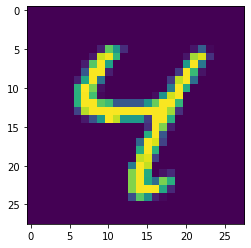

In [45]:
(_, _), (x_test, _) = mnist.load_data()
index=6
img_pred=x_test[index]
plt.imshow(img_pred)
img_test_1d = img_pred.reshape(1 , row, col, 1)

In [47]:
arr=model.predict(img_test_1d)
print(arr)
print("Number:  ",np.where(arr == np.amax(arr))[1])

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Number:   [4]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')